In [1]:
library(openxlsx)
library(ggplot2)
library(tidyverse)
library(kernlab)
library(caret)
library(gridExtra)
library(e1071)
library(VIM)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> tibble  2.1.1       <U+221A> purrr   0.3.2  
<U+221A> tidyr   0.8.3       <U+221A> dplyr   0.8.0.1
<U+221A> readr   1.3.1       <U+221A> stringr 1.4.0  
<U+221A> tibble  2.1.1       <U+221A> forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'kernlab'

The following object is masked from 'package:purrr':

    cross

The following object is masked from 'package:ggplot2':

    alpha

Loading required package: lattice

Attaching package: 'caret'

The following object is masked from 'package:purrr':

    lift


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Loading required package: colorspace
Loading required packag

In [2]:
#method_file_name = "k_means"
#method_file_name = "random"
#method_file_name = "som"
method_file_name = "kenndard_stone"
data_file_path = paste("data/",method_file_name,".xlsx",sep="")

train_df <- read.xlsx(data_file_path, sheet = 1) # training dataset
validation_df <- read.xlsx(data_file_path, sheet = 2) # validation dataset
test_df <- read.xlsx(data_file_path, sheet = 3) # testing dataset


#features names
features <- colnames(train_df)[-ncol(train_df)]
#labels
label <- colnames(train_df)[ncol(train_df)-1]
labelQ <- colnames(train_df)[ncol(train_df)]

#removing the duplicate column
train_df[label] <- NULL
validation_df[label] <- NULL
test_df[label] <- NULL
features <- c('SA/V','Th-SC','Th-Ep','Th-T','Fol-Den','Fol-Dia','Kow','ConAng','Kow-sw')
#features <- colnames(train_df)[-ncol(train_df)]
#changing the label character to factor
train_df[labelQ] <- as.factor(train_df[,labelQ])
validation_df[labelQ] <- as.factor(validation_df[,labelQ])
test_df[labelQ] <- as.factor(test_df[,labelQ])

#train_df <- unique(train_df)
#validation_df <- unique(validation_df)
#test_df <- unique(test_df)

head(train_df)
head(validation_df)
head(test_df)

Conc,SA,V,SA/V,Th-SC,Th-Ep,Th-T,Fol-Den,Fol-Dia,Enh,Kow,ConAng,Kow-sw,ConAng-sw,LayerQ
15.8547179,1256.637,4188.790,0.3000000,15.0,67.5,2.48,264.8,97,0,0.00,72,0,1,A
0.1268377,31415.927,523598.776,0.0600000,15.0,67.5,2.48,264.8,97,0,0.00,72,0,1,A
3.9636795,3298.672,41887.902,0.0787500,17.8,61.1,2.54,11.0,200,0,0.00,72,0,1,A
1.2737978,3769.911,15707.963,0.2400000,17.8,61.1,2.54,11.0,117,0,0.00,25,0,1,B
9.4000000,4300.840,26521.849,0.1621622,8.9,28.6,0.70,365.5,36,0,-1.16,0,1,0,B
18.0413267,2123.717,9202.772,0.2307692,17.8,61.1,2.54,11.0,117,0,0.00,139,0,1,B


Conc,SA,V,SA/V,Th-SC,Th-Ep,Th-T,Fol-Den,Fol-Dia,Enh,Kow,ConAng,Kow-sw,ConAng-sw,LayerQ
1.268377e-01,31415.92654,523598.77560,0.0600000,15.00000,67.50000,2.48000,264.8000,97,0,0.000,72,0,1,A
1.283477e-07,1256.63706,4188.79020,0.3000000,17.82125,61.10000,2.54742,11.0000,117,0,0.000,75,0,1,A
1.189104e+01,1256.63706,4188.79020,0.3000000,15.58889,67.54286,2.48000,264.8333,97,0,0.000,72,0,1,B
9.131662e-04,78.53982,65.44985,1.2000000,15.58889,67.54286,2.48000,264.8333,97,0,0.000,63,0,1,B
8.000000e-01,153.93804,179.59438,0.8571429,15.60000,67.50000,2.48000,264.8000,97,0,-0.075,0,1,0,B
8.067738e+00,3631.68111,20579.52628,0.1764706,17.80000,61.10000,2.54000,11.0000,117,0,0.000,90,0,1,B


Conc,SA,V,SA/V,Th-SC,Th-Ep,Th-T,Fol-Den,Fol-Dia,Enh,Kow,ConAng,Kow-sw,ConAng-sw,LayerQ
7.3957868,3848.4510,22449.29750,0.1714286,17.80000,61.10000,2.54,11.0000,200,0,0.00,72,0,1,A
33.5190452,706.8583,1767.14587,0.4000000,15.58889,67.54286,2.48,264.8333,97,0,0.00,151,0,1,B
10.0000000,4901.6699,32269.32709,0.1518987,17.82000,61.10000,2.54,11.0000,117,0,-1.16,0,1,0,B
1.0000000,66.4761,50.96501,1.3043478,16.60000,32.00000,2.09,289.0000,25,0,-1.16,0,1,0,B
2.5367549,7853.9816,65449.84695,0.1200000,17.80000,61.10000,2.54,11.0000,117,0,0.00,72,0,1,B
0.5661324,6126.1057,35342.91735,0.1733333,17.80000,61.10000,2.54,11.0000,117,0,0.00,25,0,1,B


In [3]:
train_valdiation_df <- rbind(train_df,validation_df)
trainY <- train_valdiation_df[,labelQ]

In [4]:
lpKSVM <- list(type = "Classification", library = "kernlab", loop = NULL)
lpKSVM$parameters <- data.frame(parameter = c("C","sigma"),
                     class = rep("numeric",2),
                     label = c("C","sigma"))

In [5]:
grid_tuning <- expand.grid(
  C =  30, 
  sigma = 2.8
)
lpKSVM$grid = grid_tuning

In [6]:
lpKSVM$fit <- function(x, y, wts, param, lev, last, weights, classProbs, ...) { 
    pcaX <- prcomp(x,center = TRUE,  scale = TRUE, rank. = 8)
    
    model <- kernlab::ksvm(
    x = as.matrix(pcaX$x), y = y,
    kernel = "rbfdot",
    type = "kbb-svc",
    kpar = list(sigma = param$sigma),
    C = param$C,
    prob.model = classProbs,
    ...
  )
    
  return(list(model = model,m_pca = pcaX))  
}

In [7]:
# predict function for CARET's custom model testing
lpKSVM$predict <- function(modelFit, newdata, preProc = NULL, submodels = NULL)
{
    pca_newdata <- predict(modelFit$m_pca,newdata)
    kernlab::predict(modelFit$model, pca_newdata)
}

lpKSVM$levels <- function(x) kernlab::lev(x)

lpKSVM$prob <- function(modelFit, newdata, preProc = NULL, submodels = NULL)
{    
  pca_newdata <- predict(modelFit$pca,newdata)  
  kernlab::predict(modelFit$model, pca_newdata, type = "probabilities")
}

In [8]:
# creating train control object
train_control <- caret::trainControl(
  method = "none", 
  verboseIter = TRUE,
  allowParallel = TRUE  
)

In [9]:
# searching for parameters
ksvm_base <- caret::train(
  x = train_valdiation_df[features],
  y = factor(trainY,labels = c("A","B","C","D","E")),
  trControl = train_control,
  tuneGrid = grid_tuning,
  method = lpKSVM,
)

Fitting C = 30, sigma = 2.8 on full training set


In [10]:
ksvm_base$bestTune

C,sigma
30,2.8


[1] "Checking the performance on the training set"
[1] 0.04195804


            predictions
observations  A  B  C  D  E
           A  4  0  1  0  0
           B  0 65  1  0  0
           C  0  3 63  0  0
           D  0  0  1  2  0
           E  0  0  0  0  3

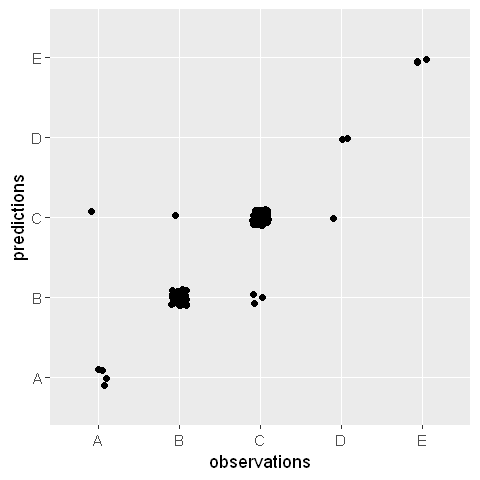

In [11]:
print("Checking the performance on the training set")
pred_labels <- ksvm_base$modelInfo$predict(ksvm_base$finalModel,train_valdiation_df[features])
print(sum(as.numeric(pred_labels) != (as.numeric(trainY)))/length(trainY))


options(repr.plot.width=4, repr.plot.height=4)
df.train = data.frame(observations = as.factor(trainY), predictions = as.factor(pred_labels) )
table(df.train)
plotTrainingSet <- ggplot(data = df.train,aes(x=observations,y=predictions)) + geom_jitter(width=0.1,height=0.1)
plotTrainingSet

In [12]:
confusionMatrix(data = df.train$observations, reference = df.train$predictions)

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C  D  E
         A  4  0  1  0  0
         B  0 65  1  0  0
         C  0  3 63  0  0
         D  0  0  1  2  0
         E  0  0  0  0  3

Overall Statistics
                                          
               Accuracy : 0.958           
                 95% CI : (0.9109, 0.9844)
    No Information Rate : 0.4755          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9258          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity           1.00000   0.9559   0.9545  1.00000  1.00000
Specificity           0.99281   0.9867   0.9610  0.99291  1.00000
Pos Pred Value        0.80000   0.9848   0.9545  0.66667  1.00000
Neg Pred Value        1.00000   0.9610   0.9610  1.00000  1.00000
Prevalence            0.02797  

[1] "Checking the performance on the testing set"
[1] 0.1875


            predictions
observations  A  B  C  D  E
           A  1  0  0  0  0
           B  0 14  2  0  0
           C  0  4  9  0  0
           D  0  0  0  1  0
           E  0  0  0  0  1

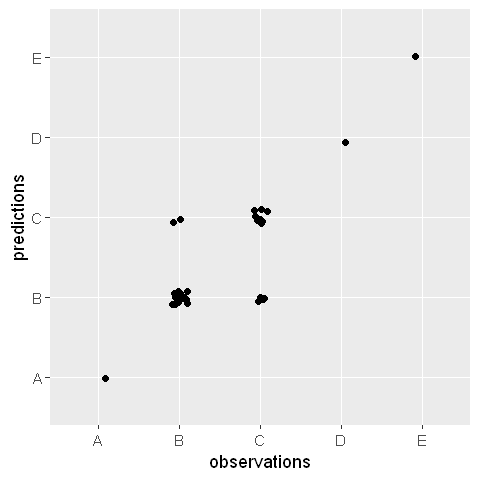

In [13]:
print("Checking the performance on the testing set")
testY <- test_df[,labelQ]
pred_labels <- ksvm_base$modelInfo$predict(ksvm_base$finalModel,test_df[features])
print(sum(as.numeric(pred_labels) != (as.numeric(testY)))/length(testY))

options(repr.plot.width=4, repr.plot.height=4)
df.test = data.frame(observations = as.factor(testY), predictions = (pred_labels) )
plotTestingSet <- ggplot(data = df.test,aes(x=observations,y=predictions)) + geom_jitter(width=0.1,height=0.1)
plotTestingSet
table(df.test)

In [14]:
confusionMatrix(data = df.test$observations, reference = df.test$predictions)

Confusion Matrix and Statistics

          Reference
Prediction  A  B  C  D  E
         A  1  0  0  0  0
         B  0 14  2  0  0
         C  0  4  9  0  0
         D  0  0  0  1  0
         E  0  0  0  0  1

Overall Statistics
                                          
               Accuracy : 0.8125          
                 95% CI : (0.6356, 0.9279)
    No Information Rate : 0.5625          
    P-Value [Acc > NIR] : 0.002762        
                                          
                  Kappa : 0.6746          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity           1.00000   0.7778   0.8182  1.00000  1.00000
Specificity           1.00000   0.8571   0.8095  1.00000  1.00000
Pos Pred Value        1.00000   0.8750   0.6923  1.00000  1.00000
Neg Pred Value        1.00000   0.7500   0.8947  1.00000  1.00000
Prevalence            0.03125  

In [15]:
vimp <- varImp(ksvm_base)
vimp

ROC curve variable importance

  variables are sorted by maximum importance across the classes
             A     B      C       D     E
Fol-Den 47.931 54.48 100.00 43.3124 54.48
SA/V    34.138 84.83  84.83 13.7409 84.83
Fol-Dia 28.276 31.72  77.24 46.3689 31.72
Th-T    29.655 46.90  77.24 31.4263 46.90
Kow      0.000 62.07  62.07  0.2874 62.07
Th-SC   20.690 62.07  54.48 22.5705 62.07
Kow-sw   8.621 62.07  62.07  3.4483 62.07
Th-Ep   47.241 54.48  24.14 11.3636 54.48
ConAng  24.483 31.72  24.14 29.8328 31.72

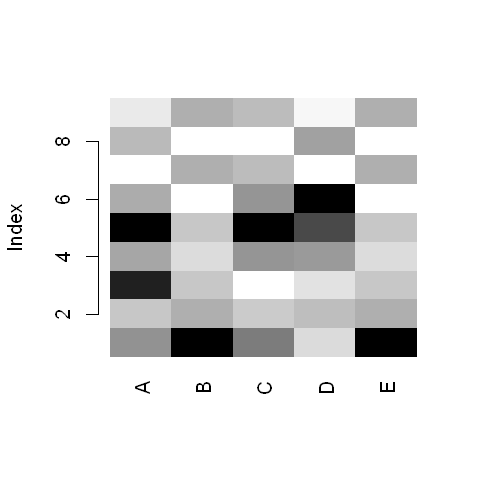

In [16]:
matrixplot(vimp$importance)